<div style="text-align: center;background-color: yellow">
    <font color='black'</font>
    <h1>PRODIGY INFOTECH VIRTUAL INTERNSHIP</h1>
    <h1>PROJECT TWO</h1>
    <h1>(TASK NAME: TWITTER SENTIMENT ANALYSIS)</h1>
</div>

## PROJECT OVERVIEW
- **Objective:** To analyze & visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

- **Dataset:** [Link to my dataset](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data)


- **Submission Date:** December 20, 2023

- **Author:** SUNMOLA M.A _sunmolaadeyanju@gmail.com_

- **References**: [Medium](https://yousufzai.medium.com/this-provides-a-comprehensive-overview-of-key-evaluation-metrics-for-classification-models-in-7466561116ec)

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 35px; display: inline; font-weight: bold;">STEP 1: DATA CLEANING & INITIAL EXPLORATION
</div>

1. Import needed dependencies
2. Load the dataset
3. Display a sample of the dataset
4. Explore the dataset's size and structure
5. Check for & Handle missing values
6. Check for & Handle data type inconsistency
7. Check for & Handle duplicates

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">**1.1 Import necessary libraries**</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">**1.2 Load the dataset**</span>


In [2]:
data = pd.read_csv("twitter_training.csv")

<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**1.3 Preview random sample of the dataset**</span>

In [3]:
data.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
6675,349,Amazon,Negative,@JeffBezos Must be be feeling the mental pain ...
70000,3993,Cyberpunk2077,Positive,a
32655,6401,Fortnite,Neutral,Epic will do mock Apple ’ s 2011 most known ic...
59178,3344,Facebook,Negative,RANT: Furious Joe Scarborough calls Mark Zucke...
6102,251,Amazon,Neutral,Want to win £20 to spend everything you want o...


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.3 Inference</span>
</div>


- The dataset features are poorly named
- Refer to the dataset metadata to understand the attributes for each feature and how they should be properly named
- This would be handled in the next section

<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**1.4 Explore the dataset's structure, size and contents**</span>

- Rename the dataset columns for comprehensability
- Check the shape of the dataset
- Check general information about the structure of the dataset

In [4]:
data.rename(columns={'2401':'Tweet ID', 'Borderlands':'Entity', 'Positive':'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Tweet Content'}, inplace=True)

#Check if it has been properly renamed
data.sample(5)

,Tweet ID,Entity,Sentiment,Tweet Content
57619,11482,TomClancysRainbowSix,Positive,Another Beauty
17694,9834,PlayStation5(PS5),Positive,"Oh yes, it seems to have been a mistake... I'l..."
46363,11956,Verizon,Negative,I look forward to the time when I will no long...
4212,1926,CallOfDutyBlackopsColdWar,Positive,Black Ops is coming out soon and I have great ...
46744,5620,HomeDepot,Negative,"my belief his deflection, projection & narciss..."


In [5]:
data.shape

(74681, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.4 Inference</span>
</div>

- The dataset contains 4 features with 74,681 records
- There are no missing values in the dataset **EXCEPT** in the last column - (i.e. the **"Tweet Content"** feature)
- This would be handled in the next section


<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**1.5 Check for & Handle missing values**</span>

In [7]:
#Check for null values
data.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [8]:
# As a check, print specific rows in the "Tweet content" column that contains 1/more missing values
data[data['Tweet Content'].isnull()].sample(5)

,Tweet ID,Entity,Sentiment,Tweet Content
9560,12845,Xbox(Xseries),Irrelevant,NaN
11326,13147,Xbox(Xseries),Irrelevant,NaN
10035,12927,Xbox(Xseries),Irrelevant,NaN
62008,5030,GrandTheftAuto(GTA),Neutral,NaN
4900,42,Amazon,Neutral,NaN


In [9]:
#Handle missing values

#Since the number of null values(686) is infinetly insignificant to the whole records,..
#The best would be to drop them from the dataset

data.dropna(subset=['Tweet Content'], inplace=True)

In [10]:
#Confirm that there are no missing values
data.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

In [11]:
#Print the resulting dataset shape
data.shape

(73995, 4)

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.5 Inference</span>
</div>


- Now, there are no missing records in the dataset
- However, the dataset has now been reduced to **73,995 records**

<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**1.6 Check for Data type consistency in each column**</span>

In [12]:
# Create an empty dataframe to store the results
data_type= pd.DataFrame(columns=['COLUMN NAMES', 'UNIQUE DATA TYPES'])

# Iterate through columns and store unique data types in the new dataframe
for column_name in data.columns:
    unique_data_types = data[column_name].apply(type).unique()
    data_type = pd.concat([data_type, pd.DataFrame({'COLUMN NAMES': [column_name], 'UNIQUE DATA TYPES': [unique_data_types]})],ignore_index=True)

# Display the resulting table
print(data_type)

    COLUMN NAMES UNIQUE DATA TYPES
0       Tweet ID   [<class 'int'>]
1         Entity   [<class 'str'>]
2      Sentiment   [<class 'str'>]
3  Tweet Content   [<class 'str'>]


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.6 Inference</span>
</div>

- The dataset features contains unique data types
- Hence, there would not be need for **type casting**

<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**1.7 Check for & Handle duplicates**</span>

In [13]:
#Check the number of duplicate entries in the dataset
duplicates_data = data[data.duplicated()]

print(f"There are {len(duplicates_data)} duplicates rows in the dataset")

There are 2340 duplicates rows in the dataset


In [14]:
#Delete the duplicate entries 
data=data.drop_duplicates(keep='first')

#Check the number records in the resulting datset
data.shape

(71655, 4)

In [15]:
#Confirm that there are no more duplicate entries the dataset
print(f"There are {len(data[data.duplicated()])} duplicates rows in the dataset")

There are 0 duplicates rows in the dataset


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.7 Inference</span>
</div>

- There are 2340 duplicate rows in the dataset
- However, they have now been removed and our resulting datset has further been reduced to **71,655 records**

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 35px; display: inline; font-weight: bold;">STEP 2: EXPLORATORY DATA ANALYSIS (EDA)</span>
</div>

1. Check for unique values
2. Handle features having inconsistent unqiue records
3. Visualize class distribution for the target variables - The Sentiment Column
4. Visualize class distribution for the Entity Column
5. Visualvarize relationship between the Entity feature and each target features
    - Entity Vs Positive Sentiment
    - Entity Vs Negative Sentiment
    - Entity Vs Neutral Sentiment
6. Visualize relationship between the Entity feature and Postive & Negative Sentiments

<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**2.1 Check for unique values**</span>

In [16]:
data_unique= pd.DataFrame(columns=['COLUMN NAMES', 'UNIQUE DATA'])
for column_name in data.columns:
    unique_data = data[column_name].nunique()
    data_unique = pd.concat([data_unique, pd.DataFrame({'COLUMN NAMES': [column_name], 'UNIQUE DATA': [unique_data]})],ignore_index=True)
print(data_unique)

    COLUMN NAMES UNIQUE DATA
0       Tweet ID       12447
1         Entity          32
2      Sentiment           4
3  Tweet Content       69490


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.1 Inference</span>
</div>

### General Inference:
- There are about 12,447 unique twitter users that contributed to this dataset
- Hence, given that there about 69,490 unique tweet messages,
- This implies that majority of unique twitter users if not all, would have tweeted more than once about a particular brand
**____________________________________________________________________________________________________________________**

### Going further:
- The **Sentiment** column ought to contain just three unique values **(Positive, Negative & Neutral)** based on the dataset metadata. I will handle this in the next section

- There are 32 unique brands/topics. However, there would be need to visualize their distribution

<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**2.2 Handle features with inconsistent unique fields**</span>

In [17]:
#Print out the unique values in the sentiment column
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [18]:
#Handle the inconsistency
data['Sentiment'].replace({'Irrelevant':'Neutral'}, inplace=True)

#Check
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.2 Inference</span>
</div>

- The **Sentiment** column now contains proper unique values according to the datset metadata

<span style="background-color: yellow; padding: 5px; display: inline;font-size: 20px;font-weight: bold;">**2.3 Visualize class distribution for the target variables - The Sentiment Columns**</span>


In [19]:
#First, let's get the unique values within the target feature

SentimentDF = pd.DataFrame(columns=['Sentiment', 'COUNT'])

for i in data['Sentiment'].unique():
    num = len(data[data['Sentiment']==i])
    SentimentDF = pd.concat([SentimentDF, pd.DataFrame({'Sentiment':[i], 'COUNT':[num]})], ignore_index=True)
    
SentimentDF.sort_values(by='COUNT', ascending=False, inplace=True)

SentimentDF

,Sentiment,COUNT
1,Neutral,30245
2,Negative,21698
0,Positive,19712


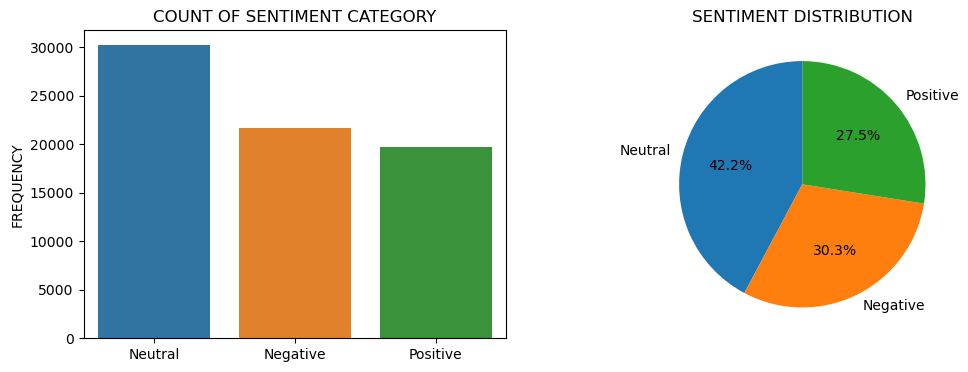

In [20]:
#Secondly, lets's visualize the the distribution with pie and bar plots

# Bar plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Sentiment', y='COUNT', data=SentimentDF, order=SentimentDF['Sentiment'])
plt.title("COUNT OF SENTIMENT CATEGORY")
plt.xlabel("")
plt.ylabel("FREQUENCY")

# Pie plot
plt.subplot(1, 2, 2)
plt.pie(SentimentDF['COUNT'], labels=SentimentDF['Sentiment'], autopct='%1.1f%%', startangle=90)
plt.title("SENTIMENT DISTRIBUTION")

plt.show()


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.3 Inference</span>
</div>

- Most of the sentiments are NEUTRAL
- And there is a very close tie between the number of POSITIVE and NEGATIVE features

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.4 Visualize class distribution for the **ENTITY Column**</span>

In [22]:
#First, let's get the unique values within the ENTITY column
pd.set_option('display.max_colwidth', None)
EntityDF = pd.DataFrame(columns=['Entity', 'COUNT'])

for i in data['Entity'].unique():
 
    num = len(data[data['Entity']==i])
    EntityDF = pd.concat([EntityDF, pd.DataFrame({'Entity':[i], 'COUNT':[num]})], ignore_index=True)
    
EntityDF.sort_values(by='COUNT', ascending=False, inplace=True)

EntityDF


,Entity,COUNT
24,TomClancysRainbowSix,2328
19,Verizon,2319
27,MaddenNFL,2315
23,CallOfDuty,2314
15,Microsoft,2304
8,WorldOfCraft,2300
5,NBA2K,2299
13,LeagueOfLegends,2296
30,TomClancysGhostRecon,2291
25,Facebook,2289


In [23]:
EntityDF['COUNT'].mean()

2239.21875

#Second, let's visualize thedistribution
plt.figure(figsize=(12, 7))
sns.barplot(x='COUNT', y='Entity', data=EntityDF, order=EntityDF['Entity'])
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("FREQUENCY")
plt.ylabel("ENTITIES")
plt.title("FREQUENCY OF ENTITY DISTRIBUTION IN TWEETS CONTENTS")
plt.show()

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.4 Inference</span>
</div>

- Though, the **TomClancyRainbowSix** represents the brand with the highest tweet contents with a value of **2328** , which relatively close to the mean **2239**
- However, there is a very close tie with the tweet contents of each brand

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.4 Generate the count of each  Tweet user in the**Tweet ID** Column</span>

In [24]:
pd.set_option('display.max_colwidth', None)
TweetID = pd.DataFrame(columns=['ID', 'COUNT'])

for i in data['Tweet ID'].unique():
    num = len(data[data['Tweet ID']==i])
    TweetID = pd.concat([TweetID, pd.DataFrame({'ID':[i], 'COUNT':[num]})], ignore_index=True)

TweetID.sort_values(by='COUNT', ascending=False, inplace=True)

TweetID.head(5)

,ID,COUNT
6223,5203,6
7989,5829,6
7911,5743,6
7912,5744,6
7913,5745,6


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.5.1 Entity Vs Positive Sentiment Relationship Visualization</span>

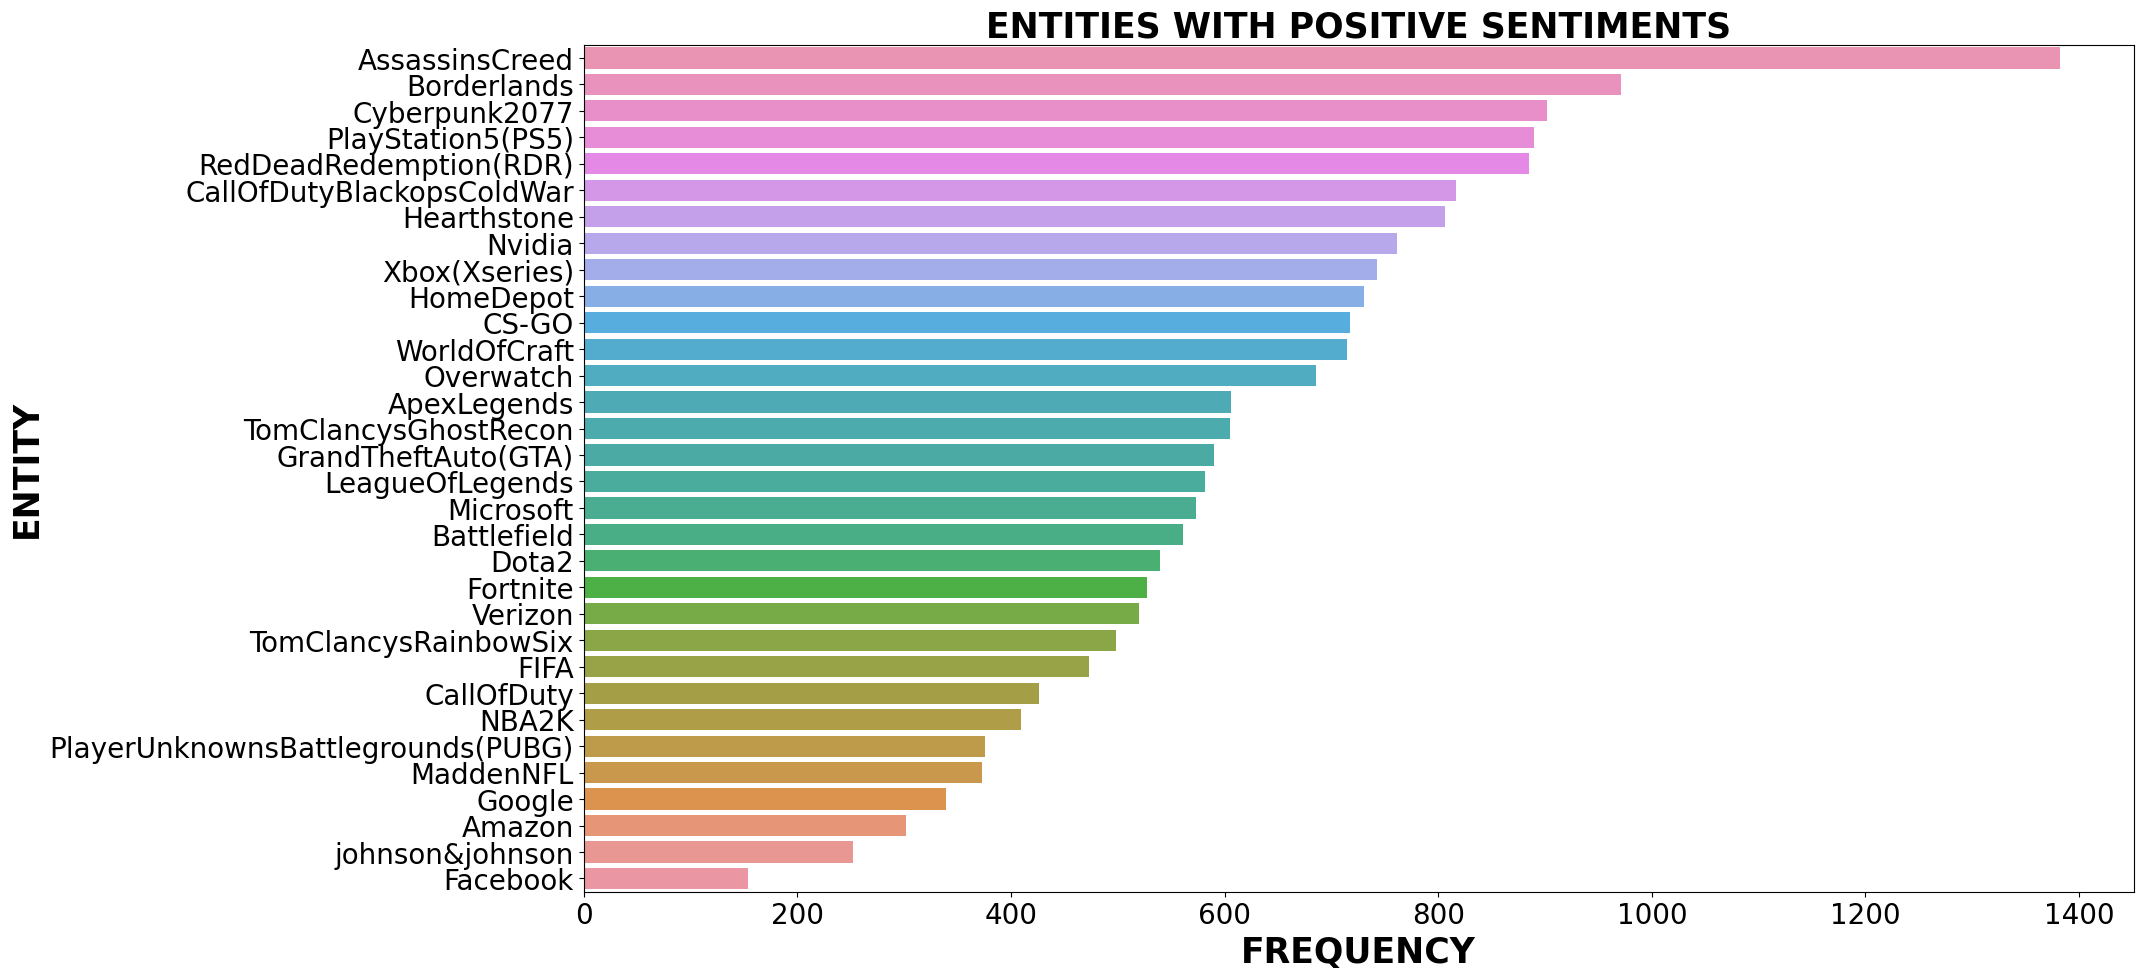

In [25]:
plt.figure(figsize=(20, 11))
sns.countplot(y=data[data['Sentiment'] == 'Positive']['Entity'],
              order=data[data['Sentiment'] == 'Positive']['Entity'].value_counts().index[::-1])
plt.gca().invert_yaxis()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt.ylabel("ENTITY", fontsize=25, fontweight='bold')
plt.title("ENTITIES WITH POSITIVE SENTIMENTS", fontsize=25, fontweight='bold')
plt.show()


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.5.1 Inference</span>
</div>

1. The top 5 brands with the most positive feedback from its end users are:
    - AssassinsCreed
    - Borderlands
    - Cyberpunk2077
    - PlayStattion5(PS5)
    - RedDeadRedemption(RDR)

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.5.2 Entity Vs Negative Sentiment Relationship Visualization</span>

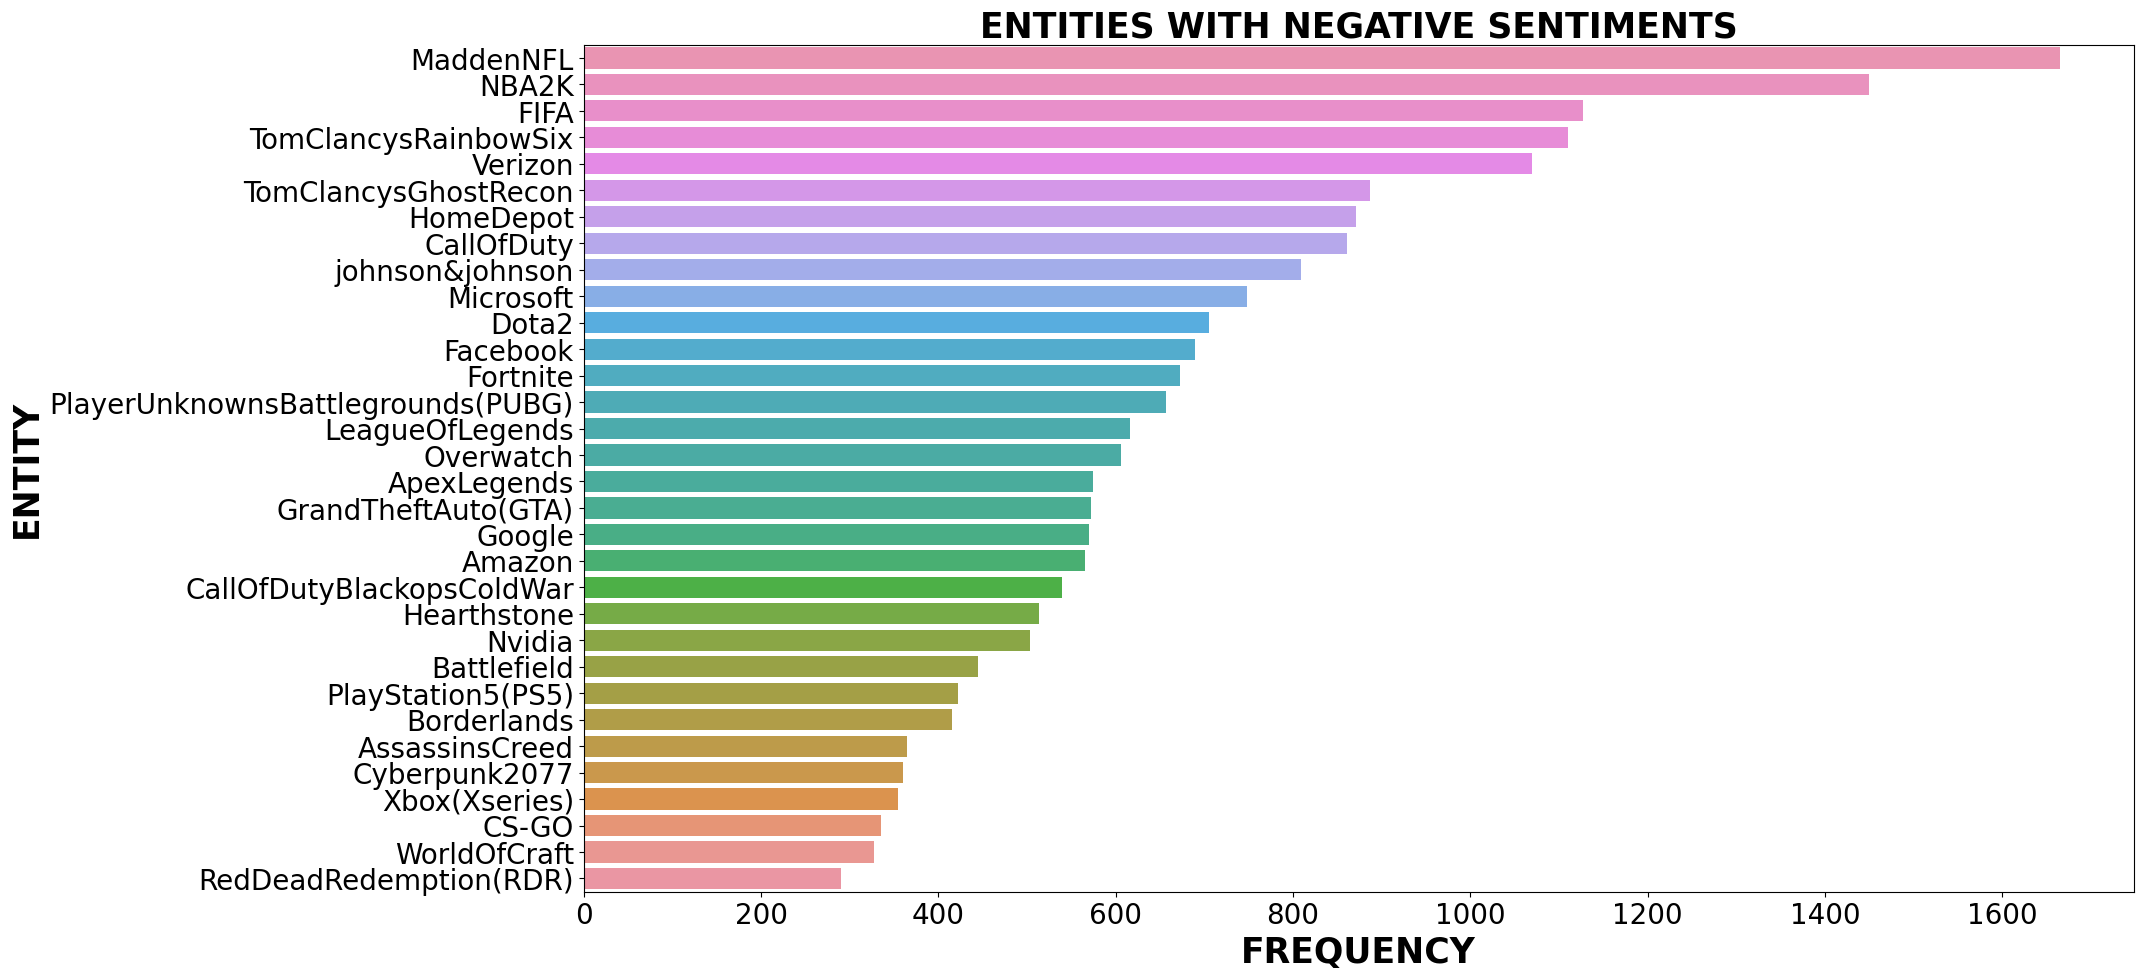

In [26]:
plt.figure(figsize=(20, 11))
sns.countplot(y=data[data['Sentiment'] == 'Negative']['Entity'],
              order=data[data['Sentiment'] == 'Negative']['Entity'].value_counts().index[::-1])
plt.gca().invert_yaxis()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt.ylabel("ENTITY", fontsize=25, fontweight='bold')
plt.title("ENTITIES WITH NEGATIVE SENTIMENTS", fontsize=25, fontweight='bold')
plt.show()


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.5.2 Inference</span>
</div>

1. The top 5 brands with the most negative feedback (i.e. least positive feedback) from its end users are:
    - MaddenNFL
    - NBA2K
    - FIFA
    - TomClancysRainbowSix
    - Verizon

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.5.3 Entity Vs Neutral Sentiment Relationship Visualization</span>

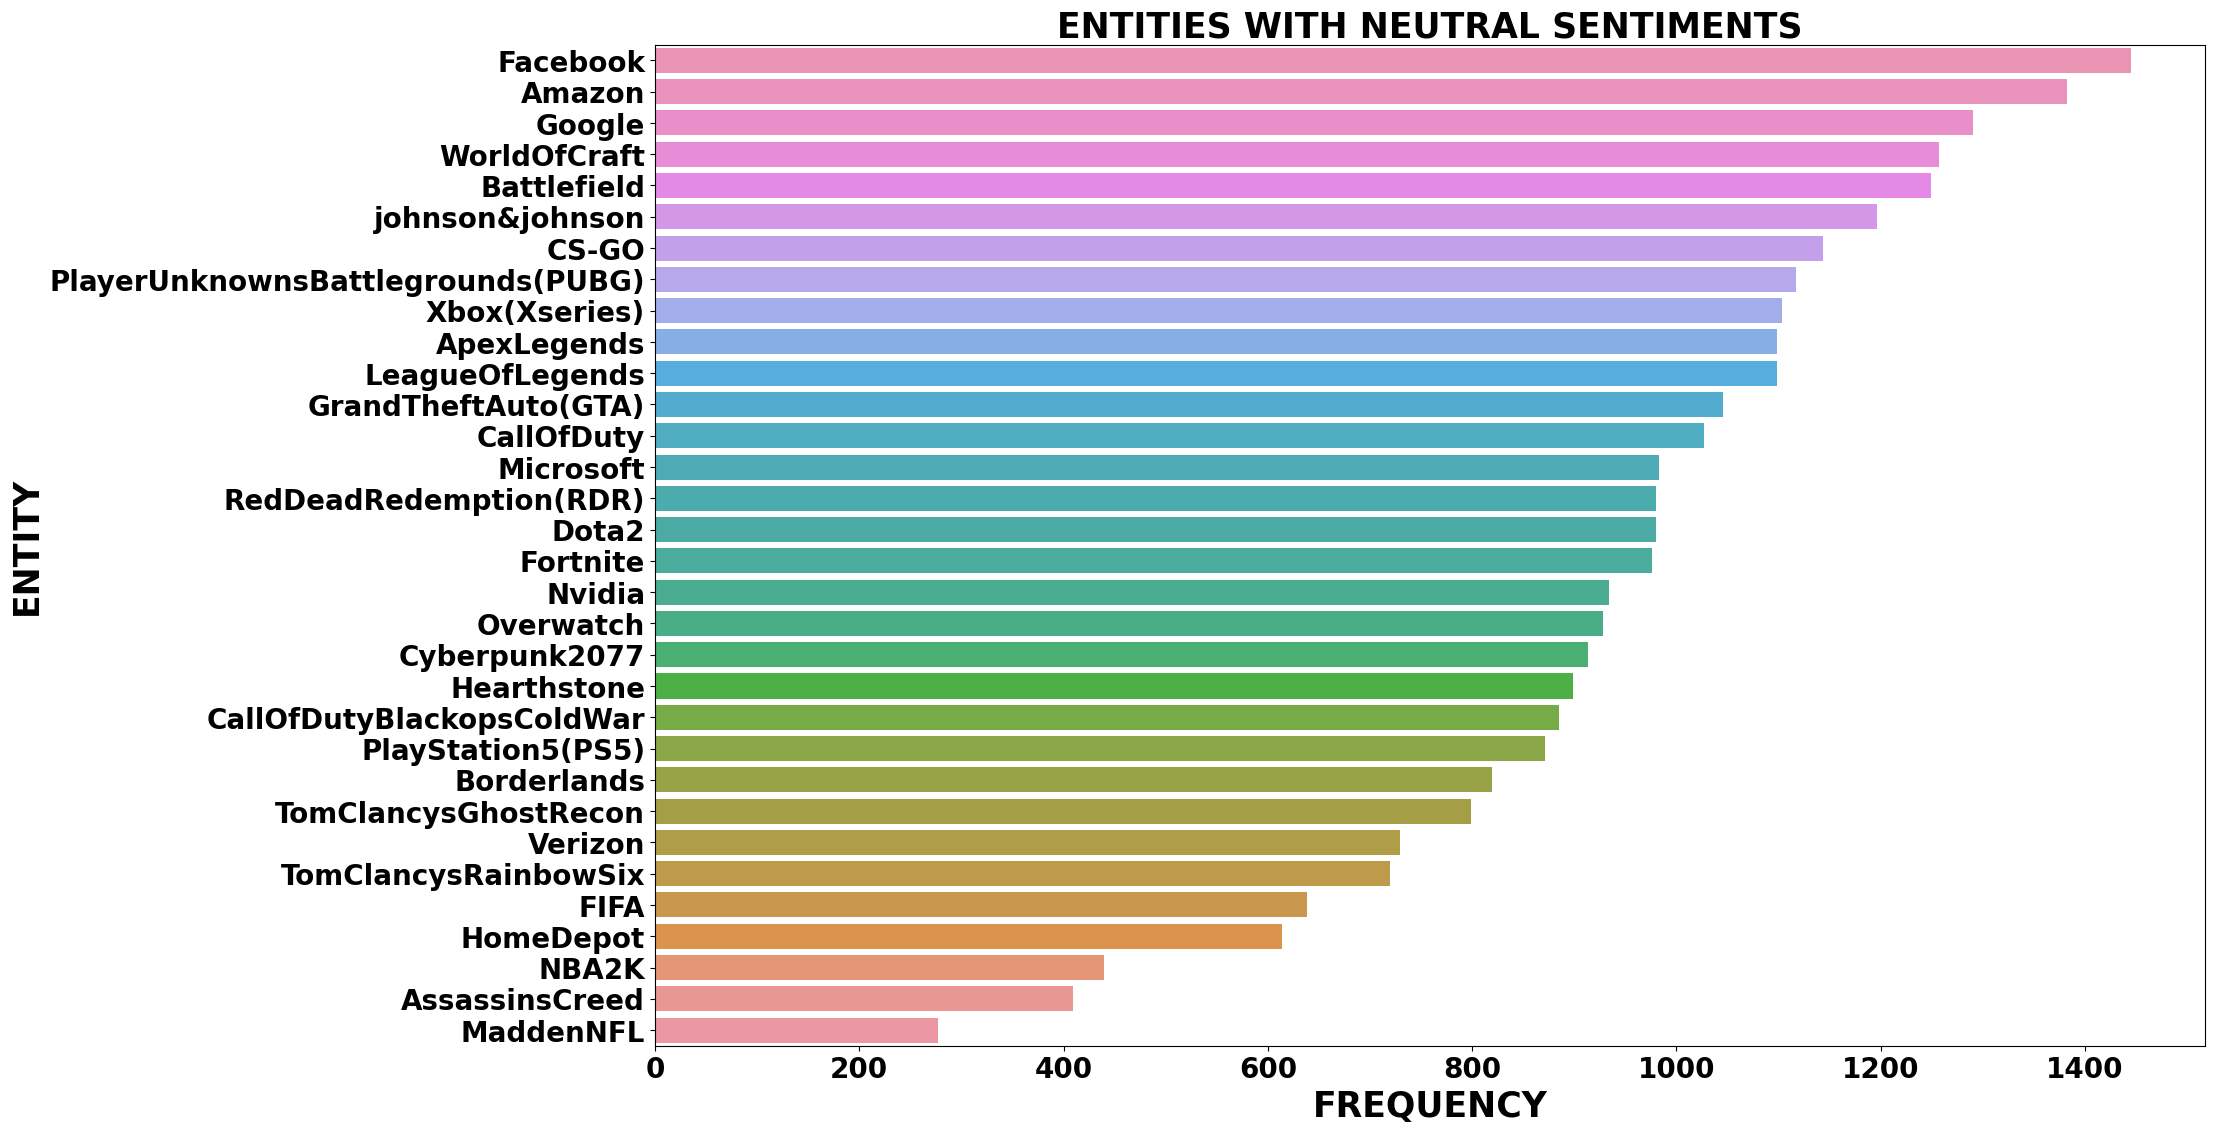

In [27]:

plt.figure(figsize=(20, 13))
sns.countplot(y=data[data['Sentiment'] == 'Neutral']['Entity'],
              order=data[data['Sentiment'] == 'Neutral']['Entity'].value_counts().index[::-1])
plt.gca().invert_yaxis()

plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt.ylabel("ENTITY", fontsize=25, fontweight='bold')
plt.title("ENTITIES WITH NEUTRAL SENTIMENTS", fontsize=25, fontweight='bold')
plt.show()


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.5.6 Entity feature Vs Postive|Negative Sentiments  Relationship</span>

In [28]:
Entity_Sentiment = pd.DataFrame(columns=['Entity', 'Frequency', 'Positive', 'Negative', 'Neutral'])

for i in data['Entity'].unique():
    num = len(data[data['Entity'] == i])
    pst = (data[(data['Entity'] == i) & (data['Sentiment'] == 'Positive')]).shape[0]
    ngt = (data[(data['Entity'] == i) & (data['Sentiment'] == 'Negative')]).shape[0]
    ntr = (data[(data['Entity'] == i) & (data['Sentiment'] == 'Neutral')]).shape[0]
    
    Entity_Sentiment = pd.concat([Entity_Sentiment, pd.DataFrame({'Entity':[i], 'Frequency':[num], 'Positive':[pst], 'Negative':[ngt], 'Neutral':[ntr]})], ignore_index=True)

Entity_Sentiment.sort_values(by='Frequency', ascending=False, inplace=True)

#Print
Entity_Sentiment.head(5)

,Entity,Frequency,Positive,Negative,Neutral
24,TomClancysRainbowSix,2328,498,1110,720
19,Verizon,2319,520,1070,729
27,MaddenNFL,2315,373,1665,277
23,CallOfDuty,2314,426,861,1027
15,Microsoft,2304,573,748,983


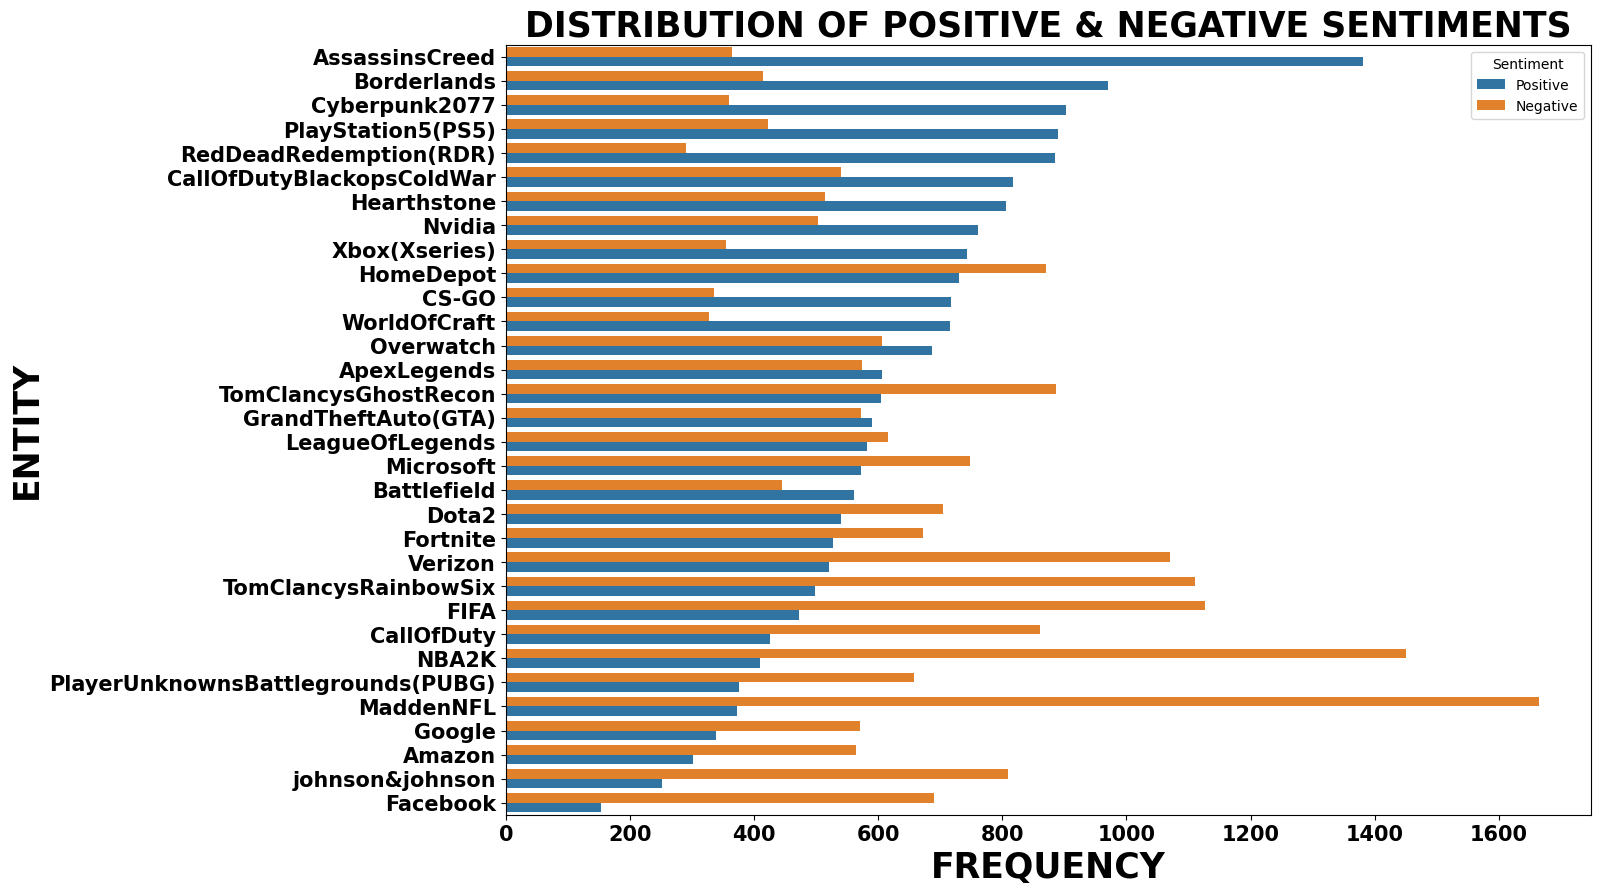

In [30]:
plt.figure(figsize=(14, 10))

# Sort the DataFrame by positive values in ascending order
Entityy_sorted = Entity_Sentiment.sort_values(by='Positive')

# Melt the DataFrame to make it suitable for Seaborn's bar plot
entityy_melted = pd.melt(Entityy_sorted, id_vars=['Entity'], value_vars=['Positive', 'Negative'])

# Create a horizontal grouped bar plot
sns.barplot(x='value', y='Entity', hue='variable', data=entityy_melted, orient='h')


plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.xlabel("FREQUENCY", fontsize=25, fontweight='bold')
plt.ylabel("ENTITY", fontsize=25, fontweight='bold')
plt.title("DISTRIBUTION OF POSITIVE & NEGATIVE SENTIMENTS", fontsize=25, fontweight='bold')
plt.legend(title="Sentiment")
plt.gca().invert_yaxis()  # Invert the y-axis to display the plot upside down
plt.show()


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 35px; display: inline; font-weight: bold;">STEP 3: DATA PREPROCESSING</span>
</div>

1. Feature engineering

2. Create a function to clean and transform Tweet contents
    1. Lower case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctiations
3. Apply the cleaning function to the 'Tweet Content' field
4. Visualize the word clouds for each target variables
5. Analyze and visualize top 7 words in each target variables

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.1 Feature Engineering</span>

In [32]:
#Import special libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

#Create new features
data['num_characters'] = data['Tweet Content'].apply(len)
data['num_words'] = data['Tweet Content'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sentences'] = data['Tweet Content'].apply(lambda x: len(nltk.sent_tokenize(x)))

#Preview the new dataset
data.sample(5)

,Tweet ID,Entity,Sentiment,Tweet Content,num_characters,num_words,num_sentences
33177,6493,Fortnite,Negative,"If Competitive of Fortnite as players didn are ’ t just ruin the game, Fortnites inability to make pubs and competitive play two different games ruined the game. Every other comp game caters to just both audiences, for example at CS : GO with its much limited maps / dungeon loadouts",283,54,2
13755,8760,NBA2K,Neutral,@NBA2K what wrong with some event?,34,8,1
25802,829,AssassinsCreed,Positive,"The real path to success"" is linear story without side quests. It's so fuckin relieving.",88,19,2
49107,6030,FIFA,Neutral,Wtf we signed up Jota in nothing like 2 hours. No Fifa shit,59,14,2
42877,10155,PlayerUnknownsBattlegrounds(PUBG),Neutral,"youtu.be / GN94mZ40. Breaking News about PUBG Mobile Un-Ban, Erangle 2.0 Coming in INDIA or not Real Reason Of Ban? 10: 49Mins & 287Likes",137,28,3


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.2 Create a function to clean **Tweet Contents**</span>

In [33]:
def clean_message(msg):
    # Lowercase the text
    msg = msg.lower()
    
    # Tokenize the text
    msg_tokens = nltk.word_tokenize(msg)
    
    # Initialize stemmer
    ps = PorterStemmer()
    
    # Create a list to store cleaned tokens
    cleaned_tokens = []
    
    for token in msg_tokens:
        # Remove non-alphanumeric characters
        cleaned_token = ''.join(char for char in token if char.isalnum())
        if cleaned_token:
            cleaned_tokens.append(cleaned_token)
    
    # Remove stopwords and punctuation
    cleaned_tokens = [token for token in cleaned_tokens if token not in stopwords.words('english') and token not in string.punctuation]
    
    # Stemming
    cleaned_tokens = [ps.stem(token) for token in cleaned_tokens]
    
    # Join the cleaned tokens into a string
    cleaned_text = " ".join(cleaned_tokens)
    
    # Remove non-ASCII characters
    cleaned_text = ''.join(char for char in cleaned_text if ord(char) < 128)
    
    return cleaned_text


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.3 Apply the function to the **Tweet Contents** feature</span>

In [35]:
data['transformed_tweets'] = data['Tweet Content'].apply(clean_message)

#Preview the new dataset
data.sample(5)

,Tweet ID,Entity,Sentiment,Tweet Content,num_characters,num_words,num_sentences,transformed_tweets
62932,5188,GrandTheftAuto(GTA),Neutral,LMAOOOO this video was me cryin,31,6,1,lmaoooo video cryin
64542,7857,MaddenNFL,Positive,I can't wait for @ EAMaddenNFL to appear next week!!.,53,14,2,ca nt wait eamaddennfl appear next week
59612,3418,Facebook,Negative,the list of racist scv people on facebook threatening to shoot anyone who who dares fight against racism in the precious predominantly white town disgust me. THIS about why we’re outraged. we can’t keep letting people beyond them think they are superior and that this is okay.,276,54,3,list racist scv peopl facebook threaten shoot anyon dare fight racism preciou predominantli white town disgust outrag keep let peopl beyond think superior okay
28759,548,ApexLegends,Neutral,@ PlayApex @ ApexLClips Spinning and spinning and spinning pic.su / GSyQIRsWQk,78,12,1,playapex apexlclip spin spin spin picsu gsyqirswqk
5246,104,Amazon,Negative,"Hey @amazon I heard with everything going on there's a delay in actually shipping<unk> but why is it when orders are now processed (which has been relatively quick), they are going out 7 day ups ground? Where's the 2 day promo prime members paid for?",250,56,2,hey amazon heard everyth go delay actual ship unk order process rel quick go 7 day up ground 2 day promo prime member paid


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.4.1 Wordclouds for Positive Sentiments</span>

In [ ]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')
pst_wc=wc.generate(data[data['Sentiment']=='Positive']['transformed_tweets'].str.cat(sep=" "))

plt.figure(figsize=(6, 6))
plt.imshow(pst_wc, interpolation='bilinear')
plt.title('WORD CLOUD FOR POSITIVE SENTIMENTS', fontweight='bold')

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.4.2 Wordclouds for Negative Sentiments</span>

In [ ]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ngt_wc=wc.generate(data[data['Sentiment']=='Negative']['transformed_tweets'].str.cat(sep=" "))

plt.figure(figsize=(6, 6))
plt.imshow(ngt_wc, interpolation='bilinear')
plt.title('WORD CLOUD FOR NEGATIVE SENTIMENTS', fontweight='bold')

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.5 Visualize top 7 words for each target feature</span>

In [ ]:
#Based on the word cloud images for positive sentiments above,
#Let's put those positive comments as a word in a container

pst_encyclopedia=[]
for msg in data[data['Sentiment']=='Positive']['transformed_tweets'].to_list():
    for word in msg.split():
       pst_encyclopedia.append(word)


#Similarly,let's put negative tweets as a word in a container
ngt_encyclopedia=[]
for msg in data[data['Sentiment']=='Negative']['transformed_tweets'].to_list():
    for word in msg.split():
       ngt_encyclopedia.append(word)
    
#However, it would be more nice to visualize the positive & negative tweets

from collections import Counter

pst_df=pd.DataFrame(Counter(pst_encyclopedia).most_common(7), columns=['word','count'])
ngt_df=pd.DataFrame(Counter(ngt_encyclopedia).most_common(7), columns=['word','count'])


# Plotting both positive and negative word frequencies on the same plot
plt.figure(figsize=(12, 4))

# Subplot for Negative Sentiment
plt.subplot(1, 2, 1)
sns.barplot(x='word', y='count', data=ngt_df, palette='Reds')
plt.title('Top 7 Words in Negative Sentiment')
plt.xticks(rotation='horizontal')

# Subplot for Positive Sentiment
plt.subplot(1, 2, 2)
sns.barplot(x='word', y='count', data=pst_df, palette='Greens')
plt.title('Top 7 Words in Positive Sentiment')
plt.xticks(rotation='horizontal')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">3.5 Inference</span>
</div>
- hhh

In [ ]:
# Convert the word lists to sets
set_pst_encyclopedia = set(pst_encyclopedia)
set_ngt_encyclopedia = set(ngt_encyclopedia)

# Find words exclusive to positive sentiment
exclusive_to_pst = set_pst_encyclopedia - set_ngt_encyclopedia

# Find words exclusive to negative sentiment
exclusive_to_ngt = set_ngt_encyclopedia - set_pst_encyclopedia

# Define colors for the bar plots
color_ngt = 'red'
color_pst = 'green'

# Plotting words exclusive to each sentiment
plt.figure(figsize=(12, 4))

# Subplot for Negative Sentiment
plt.subplot(1, 2, 1)
sns.barplot(x='word', y='count', data=ngt_df[ngt_df['word'].isin(exclusive_to_ngt)], color=color_ngt)
plt.title('Words Exclusive to Negative Sentiment')
plt.xticks(rotation='vertical')

# Subplot for Positive Sentiment
plt.subplot(1, 2, 2)
sns.barplot(x='word', y='count', data=pst_df[pst_df['word'].isin(exclusive_to_pst)], color=color_pst)
plt.title('Words Exclusive to Positive Sentiment')
plt.xticks(rotation='vertical')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

